# Car Prices - Introduction to Regression

In [653]:
import pandas as pd
import numpy as np

# models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
# for calculating the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# for splitting the data
from sklearn.model_selection import train_test_split

In [2]:
# cars data from kaggle
# https://www.kaggle.com/datasets/CooperUnion/cardataset
cars = pd.read_csv("../../Datasets/cars/data.csv")

### Data Exploration

In [3]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# since im getting an error when it comes to splitting the data,
# there could be an error where my y doesnt match the size of X
cars.count()

Make                 11914
Model                11914
Year                 11914
Engine Fuel Type     11911
Engine HP            11845
Engine Cylinders     11884
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64

In [5]:
cars.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
cars.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [7]:
cars.columns = cars.columns.str.lower()

### Data Cleaning

Since one of the features I want to use has null values, I need to fill it up first...

In [8]:
cars[cars['engine hp'].isnull()]

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,market category,vehicle size,vehicle style,highway mpg,city mpg,popularity,msrp
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,35700
9851,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,33700
9852,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,33950
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,31950


I'll try filling it out with the mode.

In [9]:
mode = cars['engine hp'].mode()[0]
print(mode)

200.0


In [10]:
# i think this doesnt overwrite the dataframe cars?
cars['engine hp'].fillna(mode)

0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11909    300.0
11910    300.0
11911    300.0
11912    300.0
11913    221.0
Name: engine hp, Length: 11914, dtype: float64

In [11]:
cars.count()

make                 11914
model                11914
year                 11914
engine fuel type     11911
engine hp            11845
engine cylinders     11884
transmission type    11914
driven_wheels        11914
number of doors      11908
market category       8172
vehicle size         11914
vehicle style        11914
highway mpg          11914
city mpg             11914
popularity           11914
msrp                 11914
dtype: int64

Turns out the error I'm encountering when splitting the data is because of the 'engine hp' count that doesn't match the msrp count.\
I need to overwrite 'engine hp' to fix that with the fillna() call I did.

In [12]:
# overwrite
cars['engine hp'] = cars['engine hp'].fillna(mode)
# cars['engine hp'] = cars['engine hp'].fillna(0) # what if i try 0?

Now I'll check if the count is the same now

In [13]:
cars.count()

make                 11914
model                11914
year                 11914
engine fuel type     11911
engine hp            11914
engine cylinders     11884
transmission type    11914
driven_wheels        11914
number of doors      11908
market category       8172
vehicle size         11914
vehicle style        11914
highway mpg          11914
city mpg             11914
popularity           11914
msrp                 11914
dtype: int64

I just found out I have to convert non-numerical data into numerical ones for a regressor model.\
I need to find out the sizes first cause it seems easier to figure out.

In [14]:
cars['vehicle size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

I can probably set **compact = 1, midsize = 2, and large = 3**

In [15]:
# vehicle sizes dictionary
size_mapping = {'Compact': 1, 'Midsize': 2, 'Large': 3}
# mapping the vehicle sizes
cars['vehicle size'] = cars['vehicle size'].map(size_mapping)

In [16]:
# confirming if it was a success
cars['vehicle size']

0        1
1        1
2        1
3        1
4        1
        ..
11909    2
11910    2
11911    2
11912    2
11913    2
Name: vehicle size, Length: 11914, dtype: int64

It worked! lessened the mean absolute error for about 300~ msrp

Now, I want to deal with the brand.\
I'm thinking of considering the popularity.

In [17]:
cars[['model', 'msrp']].sort_values(by='msrp', ascending=False)

,model,msrp
11362,Veyron 16.4,2065902
11364,Veyron 16.4,1705769
8486,Reventon,1500000
11363,Veyron 16.4,1500000
6351,Landaulet,1382750
...,...,...
4425,Expo,2000
4424,Expo,2000
4423,Expo,2000
4422,Expo,2000


I thought of adding 'popularity' in the features and it somehow lessened MAE.\
But can I really rely on such a parameter? I should probably scrap it because popular cars can be cheap/expensive. Likewise, unpopular cars can be cheap/expensive as well!

## Applying New Learnings

Good news, we can actually perform logarithmic operations on the target data to get rid of the annoying tail in the distribution of prices.\
The tail causes confusion to our model somehow.

In [18]:
# transform with log
log_transformed_prices = np.log1p(cars['msrp'])

In [19]:
# overwrite our dataframe
cars['msrp'] = log_transformed_prices
cars['msrp'].sort_values()

8117      7.601402
744       7.601402
745       7.601402
746       7.601402
747       7.601402
           ...    
6351     14.139586
11363    14.220976
8486     14.220976
11364    14.349527
11362    14.541078
Name: msrp, Length: 11914, dtype: float64

Another learning about the conversion of categorical variables to informative data for the model!!

In [120]:
cars['compact'] = (cars['vehicle size'] == 1).astype('int')
cars['midsize'] = (cars['vehicle size'] == 2).astype('int')
cars['large'] = (cars['vehicle size'] == 3).astype('int')

In [196]:
del cars['compact']
del cars['midsize']
del cars['large'] 

Now, I can add the newly added columns to my features for the model.

In [172]:
cars['number of doors'].nunique()

3

In [173]:
cars['doors_2'] = (cars['number of doors'] == 2).astype('int')
cars['doors_3'] = (cars['number of doors'] == 3).astype('int')
cars['doors_4'] = (cars['number of doors'] == 4).astype('int')

In [197]:
cars.head(3)

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,market category,vehicle size,vehicle style,highway mpg,city mpg,popularity,msrp,doors_2,doors_3,doors_4
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",1,Coupe,26,19,3916,10.739349,1,0,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",1,Convertible,28,19,3916,10.612779,1,0,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",1,Coupe,28,20,3916,10.500977,1,0,0


In [198]:
del cars['doors_2']
del cars['doors_3']
del cars['doors_4']

In [546]:
brands = list(cars.make.value_counts().head().index)

In [547]:
brands

['Chevrolet', 'Ford', 'Volkswagen', 'Toyota', 'Dodge']

In [548]:
cars.dtypes

make                  object
model                 object
year                   int64
engine fuel type      object
engine hp            float64
engine cylinders     float64
transmission type     object
driven_wheels         object
number of doors      float64
market category       object
vehicle size           int64
vehicle style         object
highway mpg            int64
city mpg               int64
popularity             int64
msrp                 float64
dtype: object

I want to have a list of the categorical variables to perform conversion on them the way I did with brands

In [706]:
categorical_variables = [
    'make', 'model', 'engine fuel type', 'driven_wheels',
    'vehicle style', 'transmission type', 'number of doors',
]

In [707]:
categories = {}

for c in categorical_variables:
    categories[c] = list(cars[c].value_counts().head().index)

In [708]:
categories

{'make': ['Chevrolet', 'Ford', 'Volkswagen', 'Toyota', 'Dodge'],
 'model': ['Silverado 1500',
  'Tundra',
  'F-150',
  'Sierra 1500',
  'Beetle Convertible'],
 'engine fuel type': ['regular unleaded',
  'premium unleaded (required)',
  'premium unleaded (recommended)',
  'flex-fuel (unleaded/E85)',
  'diesel'],
 'driven_wheels': ['front wheel drive',
  'rear wheel drive',
  'all wheel drive',
  'four wheel drive'],
 'vehicle style': ['Sedan',
  '4dr SUV',
  'Coupe',
  'Convertible',
  '4dr Hatchback'],
 'transmission type': ['AUTOMATIC',
  'MANUAL',
  'AUTOMATED_MANUAL',
  'DIRECT_DRIVE',
  'UNKNOWN'],
 'number of doors': [4.0, 2.0, 3.0]}

### Using matplotlib

In [562]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

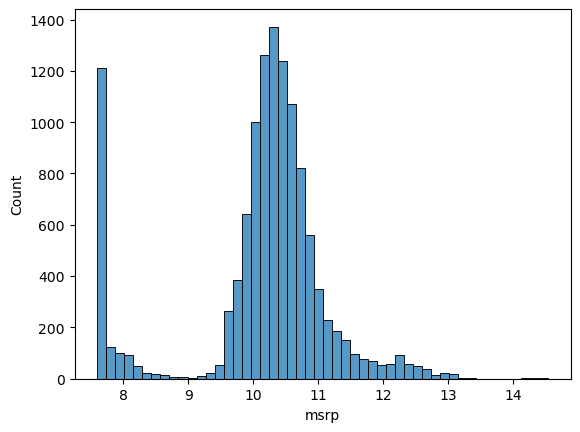

In [563]:
sns.histplot(cars.msrp, bins=50)
plt.show()

### Choosing Features and training data

In [564]:
cars.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               5 non-null      object 
 1   model              5 non-null      object 
 2   year               5 non-null      int64  
 3   engine fuel type   5 non-null      object 
 4   engine hp          5 non-null      float64
 5   engine cylinders   5 non-null      float64
 6   transmission type  5 non-null      object 
 7   driven_wheels      5 non-null      object 
 8   number of doors    5 non-null      float64
 9   market category    5 non-null      object 
 10  vehicle size       5 non-null      int64  
 11  vehicle style      5 non-null      object 
 12  highway mpg        5 non-null      int64  
 13  city mpg           5 non-null      int64  
 14  popularity         5 non-null      int64  
 15  msrp               5 non-null      float64
dtypes: float64(4), int64(5), objec

In [255]:
X = cars
y = cars.msrp

Confirming shapes...

In [257]:
cars.values.shape

(11914, 16)

In [258]:
y.shape

(11914,)

### Splitting Data

In [637]:
# split the data into 60% training and 40% temporary (validation + testing)
train_X, tmp_X, train_y, tmp_y = train_test_split(X, y, test_size=0.4, random_state=1)

# further split the temporary data into 20% validation and 20% testing
val_X, test_X, val_y, test_y = train_test_split(tmp_X, tmp_y, test_size=0.5, random_state=1)

After lecture 2.4, I learned to drop irrelevant values like the indices before training the model.\
Shuffling was also recommended but train_test_split already does that.

In [638]:
train_y = train_y.values
val_y = val_y.values
test_y = test_y.values

### Training

In [726]:
# feature list
base = [
    'year', 'engine hp', 'engine cylinders', 
    'highway mpg', 'city mpg', 'vehicle size', 
    'popularity',
]

In [730]:
def prepare_X(df):
    # work with the copies
    df = df.copy()
    features = base.copy()

    # modify year as age
    df['year'] = 2017 - df['year']

    # categorical variables
    for c, values in categories.items():
        for v in values:
            df[('%s_%s' % (c, v)).lower()] = (df[c] == v).astype('int')
            features.append(('%s_%s' % (c, v)).lower())
                             
    # return as numpy array
    XX = df[features].fillna(0)
    return XX.values

In [731]:
X_train = prepare_X(train_X)

In [732]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, train_y)

RandomForestRegressor(random_state=1)

In [733]:
### test accuracy using validation data
# prepare validation X
val = prepare_X(val_X)
rf_val_predictions = rf_model.predict(val)
# convert log transformed predictions
# dont forget to subtract 1 because we added 1 with log operations earlier.
rf_val =  np.expm1(rf_val_predictions)
# comparison
rf_val_mae = mean_absolute_error(rf_val, np.expm1(val_y))

In [734]:
print(rf_val_mae)

3759.316195392727


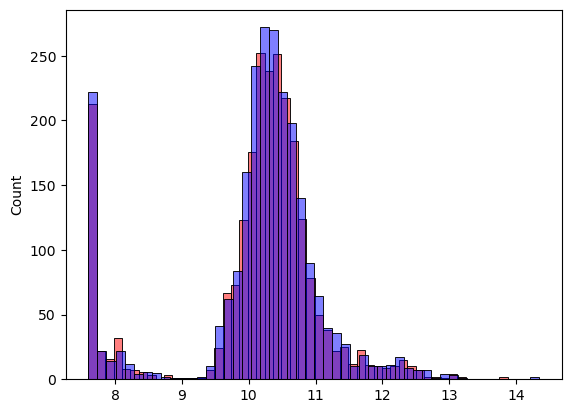

In [735]:
sns.histplot(rf_val_predictions, bins=50, color='red', alpha=0.5)
sns.histplot(val_y, bins=50, color='blue', alpha=0.5)
plt.show()

I just learned about **Root Mean Squared Error** - another way to assess the model's accuracy!
I'll be using it for 

In [736]:
def rmse(prediction, target):
    squared_error = np.square(prediction - target)
    mean_squared_error = np.mean(squared_error)
    return np.sqrt(mean_squared_error)

In [737]:
rmse(rf_val_predictions, val_y).round(4)

0.1128